In [23]:
import sys
print(sys.version)
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

from astropy.timeseries import LombScargle

# configure notebook for plotting
%matplotlib inline

# mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')


3.9.18 (main, Sep 11 2023, 08:38:23) 
[Clang 14.0.6 ]


In [24]:
# pip install --upgrade numpy

In [25]:
# pip install --upgrade matplotlib

In [26]:
ddir_stars = '/Users/eleanor/Downloads/universe_2/' # point this to where you unzip your data!

ddir = ddir_stars + '/Variable_Star_Data/'

In [27]:
fname = 'LeftS046546.csv' # put your filename here
#fname = 'FrontS036691.csv' # put your filename here

data = pd.read_csv(ddir+fname) # load in CSV data as a Pandas object
print(data.keys()) # see what's in it
time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables
dt = np.median(np.diff(time))
print('Nyquist Limit',0.5/dt,'cycles per hour') # can't get frequencies higher than the Nyquist limit

Index(['Time', 'NormalisedFlux'], dtype='object')
Nyquist Limit 0.5 cycles per hour


In [28]:
data['Time']

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
116    116.0
117    117.0
118    118.0
119    119.0
120    120.0
Name: Time, Length: 121, dtype: float64

Text(0, 0.5, 'Relative Flux')

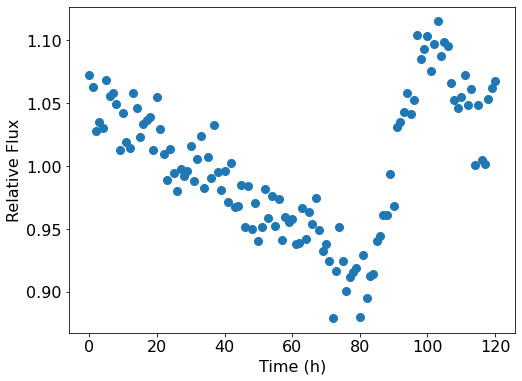

In [29]:
plt.plot(time,flux,'.',markersize=16)
plt.xlabel('Time (h)')
plt.ylabel('Relative Flux')

In [30]:
LS = LombScargle(time,flux) # initialize a Lomb-Scargle algorithm from Astropy
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
power = LS.power(freqs) # calculate LS power

In [31]:
print('Best period: %.2f h' % (1/freqs[np.argmax(power)]))

Best period: 100.00 h


Text(0, 0.5, 'LS Power')

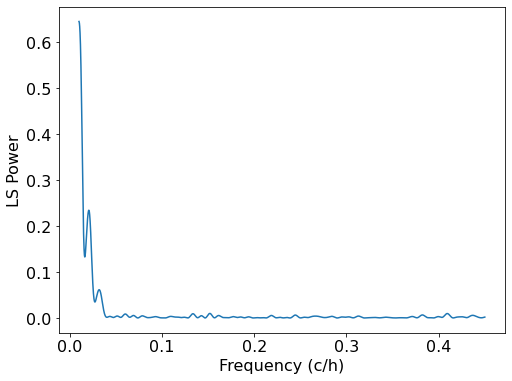

In [32]:
plt.plot(freqs,power)
plt.xlabel('Frequency (c/h)')
plt.ylabel('LS Power')

In [33]:
import glob # this package lets you search for filenames

fnames = glob.glob(ddir+'*.csv')
#print(fnames[:10])

In [34]:
#f1=fnames[6].split('/')[-1].split('.')[0]
#print(f1)
#f2='RightS169504'
#f2 = bytes(f2,'utf-8')
#print(type(f2))
#print(f2)
#variables['Name']==f2

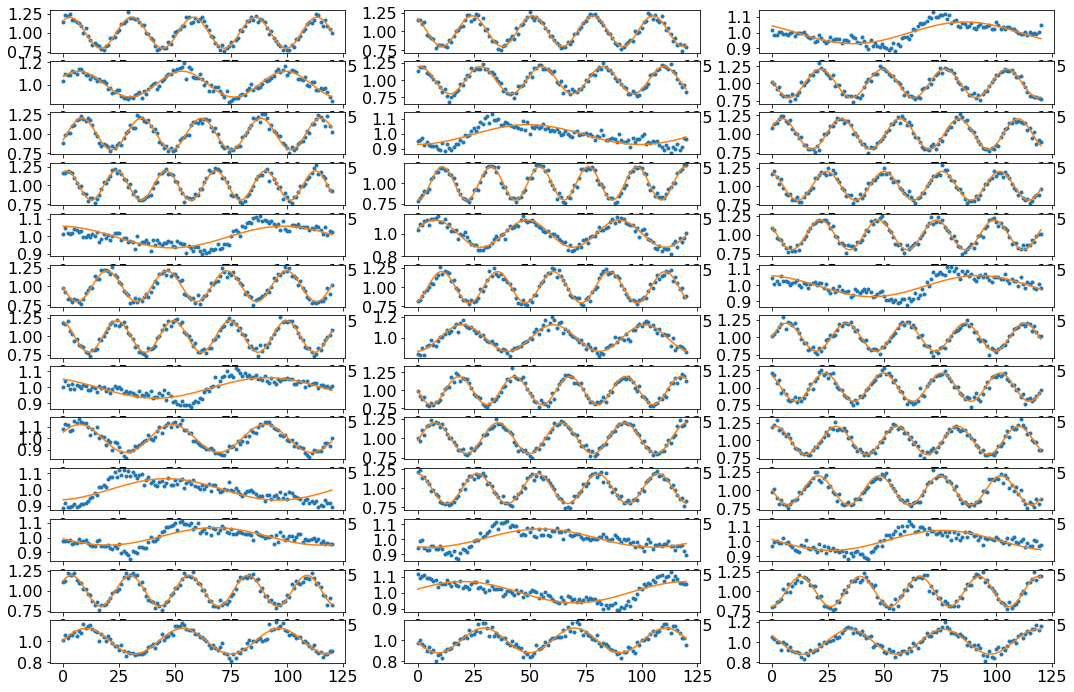

In [35]:
freqs = np.linspace(1/100,0.49,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 

fig, axes = plt.subplots(13,3,figsize=(18,12))
# for fname, ax in zip(fnames[:12], axes.ravel()): # you can loop over two things
for fname, ax in zip(fnames, axes.ravel()): # you can loop over two things
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    ax.plot(time,flux,'.')
    ax.plot(time,pred) # plot the model over the data
    
    periods.append(1/bestfreq) # add each period to the list
    
periods = np.array(periods) # turn it from a list to an array

In [65]:
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 
names = []

for fname in tqdm(fnames): # tqdm is a package that gives you a progress bar - neat! 
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    
    periods.append(1/bestfreq) # add each period to the list
    names.append(os.path.basename(fname).strip('.csv')) # os.path.basename gets rid of directories and gives you the filename; then we strip '.csv'
    
periods = np.array(periods) # turn it from a list to an array

100%|██████████████████████████████████████| 7085/7085 [00:26<00:00, 262.84it/s]


In [66]:
# import glob # this package lets you search for filenames
# import os

# variables = pd.DataFrame({'Name':names,'Period':periods}) # you can turn a dictionary into a dataframe like this
# # variables.Name = variables.Name.astype('|S') # have to do this so that it knows the names are strings
# variables.Name = variables.Name.astype('string') # have to do this so that it knows the names are strings

# all_star_files = glob.glob(ddir_stars+'*/Star_Data.csv')

# all_stars = pd.concat([pd.read_csv(table) for table in all_star_files]) # we are concatenating a list of dataframes; 
# #we generate this list with a "list comprehension", a loop you write inside a list bracket 

# # all_stars.Name = all_stars.Name.astype('|S') # have to do this so that it knows the names are strings
# all_stars.Name = all_stars.Name.astype('string') # have to do this so that it knows the names are strings
# all_stars = all_stars[all_stars.Parallax > 0.01] # 10 mas parallax cut
# print(len(all_stars),'stars above 10 mas parallax') # check how many stars there are total with good parallax

# variables = pd.merge(all_stars,variables,on='Name') # merge these two arrays according to the keyword 'name'

# print('Of which',len(variables),'variables') # cut down to a small list
# # print(all_stars)
# # print(variables)

In [67]:
import glob # this package lets you search for filenames
import os

variables = pd.DataFrame({'Name':names,
              'Period':periods}) # you can turn a dictionary into a dataframe like this
#variables.Name = variables.Name.astype('|S') # have to do this so that it knows the names are strings
variables.Name = variables.Name.astype('string')

all_star_files = glob.glob(ddir_stars+'*/Star_Data.csv')

all_stars = pd.concat([pd.read_csv(table) for table in all_star_files]) # we are concatenating a list of dataframes; 
#we generate this list with a "list comprehension", a loop you write inside a list bracket 

#all_stars.Name = all_stars.Name.astype('|S') # have to do this so that it knows the names are strings
all_stars.Name = all_stars.Name.astype('string')
all_stars = all_stars[all_stars.Parallax > 0.01] # 10 mas parallax cut
print(len(all_stars),'stars above 10 mas parallax') # check how many stars there are total with good parallax

variables = pd.merge(all_stars,variables,on='Name') # merge these two arrays according to the keyword 'name'
print('Of which',len(variables),'variables') # cut down to a small list


889 stars above 10 mas parallax
Of which 39 variables


In [68]:
#all_stars.head()

In [69]:
#variables.head()

In [70]:
#pd.merge(all_stars,variables,on='Name').head()


In [71]:
m0, m1, m2 = np.log10(all_stars['BlueF']), np.log10(all_stars['GreenF']), np.log10(all_stars['RedF']) 
colour = m2-m0
abs_mag = m1 + 2*np.log10(1./all_stars.Parallax) 

v0, v1, v2 = np.log10(variables['BlueF']), np.log10(variables['GreenF']), np.log10(variables['RedF']) 
variable_colour = v2-v0
abs_mag_v = v1 + 2*np.log10(1./variables.Parallax)

In [72]:
import numpy as np # for maths 
import matplotlib as mpl # for plotting 
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

# configure notebook for plotting
%matplotlib inline

# subsequent lines default plot settings
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['figure.figsize']=(8.0,6.0)   
mpl.rcParams['font.size']=16              
mpl.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

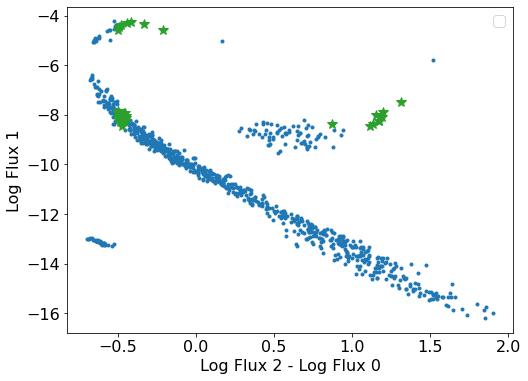

In [73]:
s = plt.plot(colour,abs_mag,'.C0')
h = plt.plot(variable_colour,abs_mag_v,'.C2',marker='*',markersize=10)

    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')


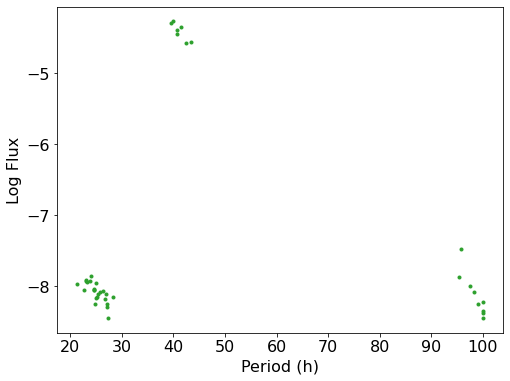

In [74]:
plt.plot(variables.Period,abs_mag_v,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

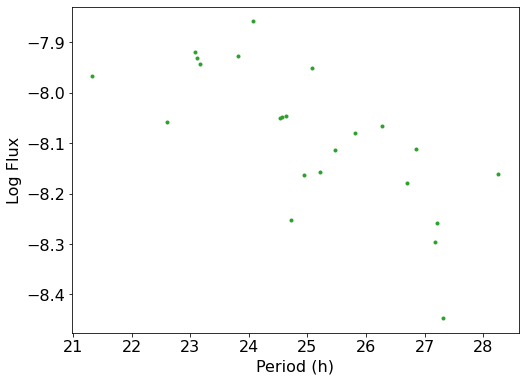

In [75]:
varp1=variables.Period[(variables.Period<35)]
mag1=abs_mag_v[(variables.Period<35)]

plt.plot(varp1,mag1,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

 Recovered parameters: -0.06, -6.64


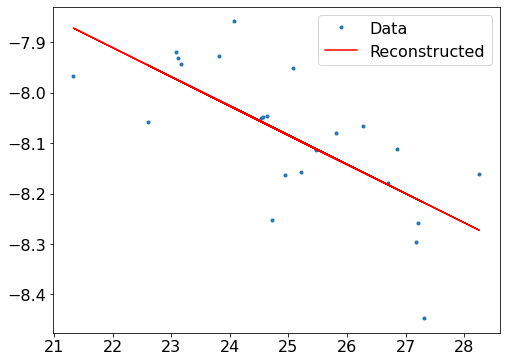

In [76]:
A = np.vander(varp1,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,mag1)
print(' Recovered parameters: %.2f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

plt.plot(varp1,mag1,'.',label='Data')
plt.plot(varp1,reconstructed,'-r',label='Reconstructed')
#plt.plot(x,12*x-5,'-k',label='True')
plt.legend()

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3355.30it/s]


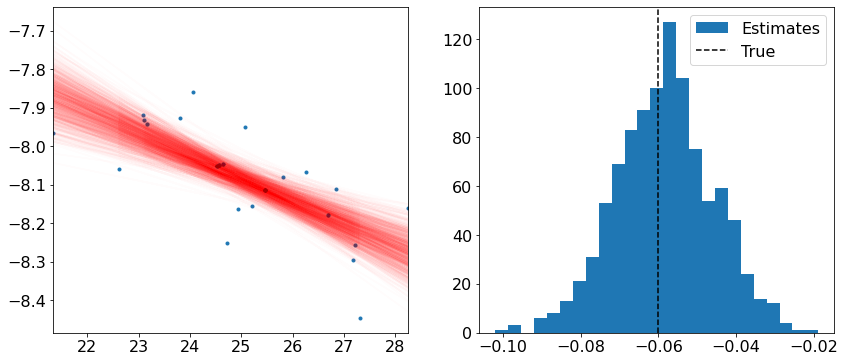

In [82]:
bs = np.zeros((2,1000))

fig, (ax11, ax12) = plt.subplots(1,2,figsize=(14.0,6.0))

ax11.plot(varp1,mag1,'.')
ax11.set_xlim(varp1.min(),varp1.max())

#number in front of np.random is standrad deviation / error bars
for j in tqdm(range(1000)):
    ydash = mag1 + 0.1*np.random.randn(len(varp1)) # generate random samples
    bdash, _, _, _ = np.linalg.lstsq(A,ydash) # for each sample, redo the solve
    reconstructed = A @ bdash # @ is shorthand for matrix multiplication in python

    bs[:,j] = bdash
    ax11.plot(varp1,reconstructed,'-r',alpha=0.01) # plot with low alpha = transparent, great way to show density of many curves

#ax1.plot(x,12*x-5,'-k')

ax12.hist(bs[0],bins=25,label='Estimates'); # 0 is slope, 1 is intercept
ax12.axvline(-0.06,color='k',linestyle='--',label='True')
ax12.legend()

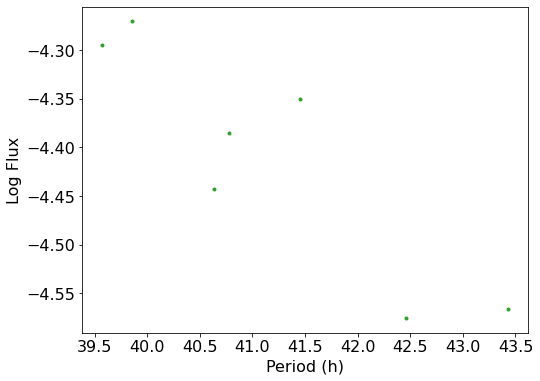

In [57]:
varp2=variables.Period[(abs_mag_v>-5)]
mag2=abs_mag_v[(abs_mag_v>-5)]

plt.plot(varp2,mag2,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

 Recovered parameters: -0.08, -1.17


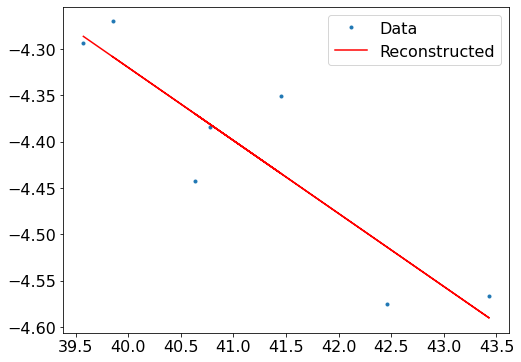

In [58]:
A = np.vander(varp2,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,mag2)
print(' Recovered parameters: %.2f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

plt.plot(varp2,mag2,'.',label='Data')
plt.plot(varp2,reconstructed,'-r',label='Reconstructed')
#plt.plot(x,12*x-5,'-k',label='True')
plt.legend()

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2346.18it/s]


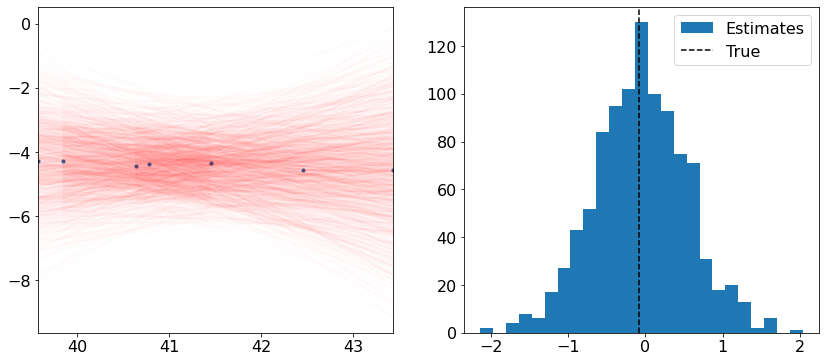

In [59]:
bs = np.zeros((2,1000))

fig, (ax21, ax22) = plt.subplots(1,2,figsize=(14.0,6.0))

ax21.plot(varp2,mag2,'.')
ax21.set_xlim(varp2.min(),varp2.max())

for j in tqdm(range(1000)):
    ydash = mag2 + 2*np.random.randn(len(varp2)) # generate random samples
    bdash, _, _, _ = np.linalg.lstsq(A,ydash) # for each sample, redo the solve
    reconstructed = A @ bdash # @ is shorthand for matrix multiplication in python

    bs[:,j] = bdash
    ax21.plot(varp2,reconstructed,'-r',alpha=0.01) # plot with low alpha = transparent, great way to show density of many curves

#ax1.plot(x,12*x-5,'-k')

ax22.hist(bs[0],bins=25,label='Estimates'); # 0 is slope, 1 is intercept
ax22.axvline(-0.08,color='k',linestyle='--',label='True')
ax22.legend()

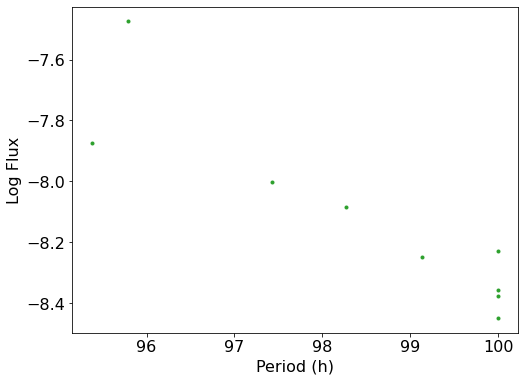

In [84]:
varp3=variables.Period[(variables.Period>85)]
mag3=abs_mag_v[(variables.Period>85)]

plt.plot(varp3,mag3,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

 Recovered parameters: -0.15, 6.58


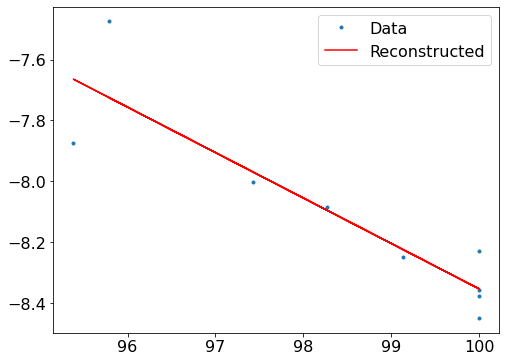

In [85]:
A = np.vander(varp3,2) # the Vandermonde matrix of order N is the matrix of polynomials of an input vector 1, x, x**2, etc

b, residuals, rank, s = np.linalg.lstsq(A,mag3)
print(' Recovered parameters: %.2f, %.2f' % (b[0],b[1]))

reconstructed = A @ b # @ is shorthand for matrix multiplication in python

plt.plot(varp3,mag3,'.',label='Data')
plt.plot(varp3,reconstructed,'-r',label='Reconstructed')
#plt.plot(x,12*x-5,'-k',label='True')
plt.legend()

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3518.83it/s]


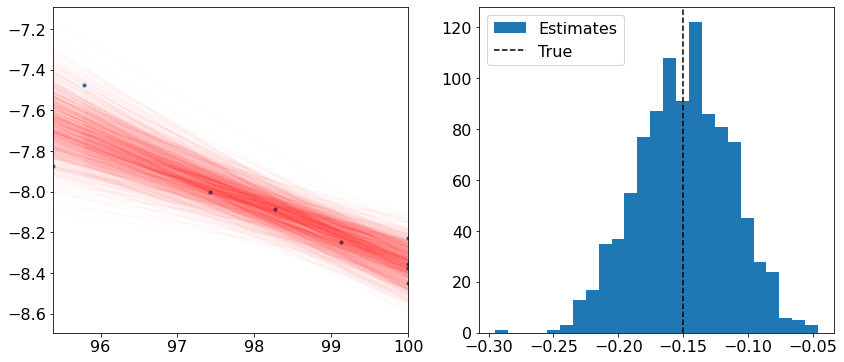

In [91]:
#error could be 0.2 as this encompasses all points but im not sure if i am supposed to do it like this
bs = np.zeros((2,1000))

fig, (ax31, ax32) = plt.subplots(1,2,figsize=(14.0,6.0))

ax31.plot(varp3,mag3,'.')
ax31.set_xlim(varp3.min(),varp3.max())

for j in tqdm(range(1000)):
    ydash = mag3 + 0.2*np.random.randn(len(varp3)) # generate random samples
    bdash, _, _, _ = np.linalg.lstsq(A,ydash) # for each sample, redo the solve
    reconstructed = A @ bdash # @ is shorthand for matrix multiplication in python

    bs[:,j] = bdash
    ax31.plot(varp3,reconstructed,'-r',alpha=0.01) # plot with low alpha = transparent, great way to show density of many curves

#ax1.plot(x,12*x-5,'-k')

ax32.hist(bs[0],bins=25,label='Estimates'); # 0 is slope, 1 is intercept
ax32.axvline(-0.15,color='k',linestyle='--',label='True')
ax32.legend()